#Introduction
This notebook was written in Google Colab and you will need to log in with your Google account in order to download the pre-trained model for the evaluation.

---

*Note 1*: To save the user from the hassle of uploading files, a GitHub repository will be downloaded. Make sure you are always within the `content/ILSVRCPlus` directory.

You can always check your current working directory by using the magic: `%pwd`

---

*Note 2*: If you are impatient and you don't want to train the model, skip to Section 5 to download the pre-trained model from Google Drive and evaluate it.

Make sure you downloaded the dataset first, from Section 2.

In [0]:
%pwd


##1. Clone the repository
First of all, let's clone my repository, that contains the implementations of the models and jump in to the generated directory.

In [1]:
!git clone https://github.com/kaseris/ILSVRCPlus.git
%cd ILSVRCPlus

Cloning into 'ILSVRCPlus'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 271 (delta 145), reused 185 (delta 70), pack-reused 0
Receiving objects: 100% (271/271), 24.88 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/ILSVRCPlus


##2. Download the CIFAR-10 dataset
We download the CIFAR-10 dataset and we show some of its samples. The VGG model will be trained on this dataset.

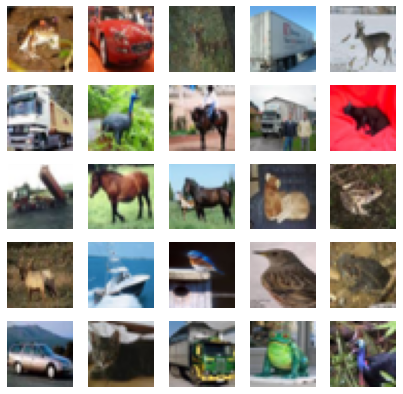

In [11]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(trainX, trainY), (testX, testY) = cifar10.load_data()
fig, ax = plt.subplots(5, 5, figsize=(7,7))
for i in range(0, 5):
  for j in range(0, 5):
    ax[i][j].axis('off')
    ax[i][j].imshow(trainX[i + 5 * j, :, :])

##3. Train the model
In this cell, we import and instantiate a VGG architecture and train on the MNIST dataset. You can skip this step and download the pretrained model from the Google Drive folder:

https://drive.google.com/drive/folders/16AeENomjhIT1C3vmw1fc85xP2SSlZe5z?usp=sharing

In [2]:
import VGGNetCIFAR10
vgg = VGGNetCIFAR10.VGGNetCIFAR()

maxepochs=150
history = vgg.train(epochs=maxepochs, learning_rate=0.1, batch_size=128)

Using TensorFlow backend.


[INFO]: Downloading the dataset
[INFO]: Compiling model
[INFO]: Training model
Epoch 1/150
390/390 [==============================] - 56s 143ms/step - loss: 19.1882 - accuracy: 0.1933 - val_loss: 13.8704 - val_accuracy: 0.1226
Epoch 2/150
390/390 [==============================] - 43s 111ms/step - loss: 9.8561 - accuracy: 0.3159 - val_loss: 7.8863 - val_accuracy: 0.1224
Epoch 3/150
390/390 [==============================] - 44s 112ms/step - loss: 5.4999 - accuracy: 0.3855 - val_loss: 5.1177 - val_accuracy: 0.2622
Epoch 4/150
390/390 [==============================] - 44s 112ms/step - loss: 3.4663 - accuracy: 0.4748 - val_loss: 3.0392 - val_accuracy: 0.4216
Epoch 5/150
390/390 [==============================] - 44s 112ms/step - loss: 2.4024 - accuracy: 0.5433 - val_loss: 2.0936 - val_accuracy: 0.5654
Epoch 6/150
390/390 [==============================] - 44s 112ms/step - loss: 1.8899 - accuracy: 0.5980 - val_loss: 1.7222 - val_accuracy: 0.6264
Epoch 7/150
390/390 [======================

##4. Plot the learning curves


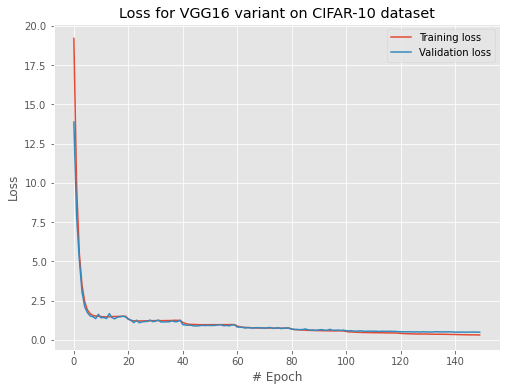

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(8,6))
plt.plot(range(maxepochs), history.history['loss'], label='Training loss')
plt.plot(range(maxepochs), history.history['val_loss'], label='Validation loss')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.title('Loss for VGG16 variant on CIFAR-10 dataset')
plt.legend()
plt.show()

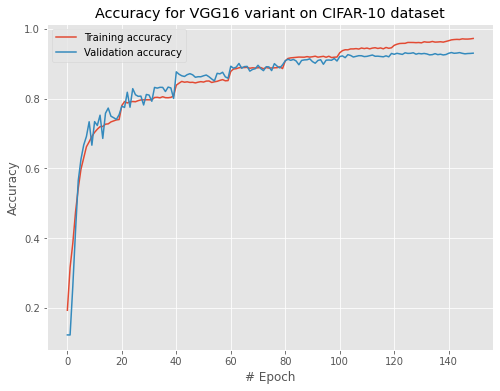

In [4]:
plt.figure(figsize=(8,6))
plt.plot(range(maxepochs), history.history['accuracy'], label='Training accuracy')
plt.plot(range(maxepochs), history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for VGG16 variant on CIFAR-10 dataset')
plt.legend()
plt.show()

##5. Model evaluation

###5.1 Evaluate the trained model
You will be asked to log in with you Google account credentials to get the verification code. The verification code will look like this:

Use Chrome if the image does not appear.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1o8yYGesQA6qc9vL8zFr4nz_AuLDe8LFn" width="400">
</figure>

Copy your code and paste it to the prompt that will pop out after executing the cell below.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = "1Gt3TGHsgrxqN3ZDZBGn-6vao6k4c6ysA" # The saved model for the CIFAR VGG
downloaded = drive.CreateFile({'id':file_id})
filename = 'CIFAR-VGGNet-weights-improvement-142-0.93.hdf5'
downloaded.GetContentFile(filename)

In [0]:
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
vgg_cifar = load_model(filename)

try:
  trainX = trainX.astype(np.float32)
  testX = testX.astype(np.float32)

  mean = np.mean(trainX, axis=(0, 1, 2, 3))
  std = np.std(trainX, axis=(0, 1, 2, 3))
  testX = (testX - mean) / (std + 1e-7)

  testY = to_categorical(testY, 10)
except NameError:
  print("The variable is not defined. Make sure you downloaded the dataset at the second cell.")

In [13]:
val_loss, val_accuracy = vgg_cifar.evaluate(testX, testY)
print("[INFO]: Evaluating the model on the test set")
print("Validation loss: {:.3f}".format(val_loss))
print("Validation accuracy: {:.3f}".format(val_accuracy))

10000/10000 [==============================] - 5s 469us/step
Validation loss: 0.483
Validation accuracy: 0.932


###5.2 Print the classification report.
How well did our model do on each individual class?


In [14]:
from sklearn.metrics import classification_report
label_names = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]
y_hat = vgg_cifar.predict(testX)
print(classification_report(testY.argmax(axis=1), y_hat.argmax(axis=1), target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.94      0.93      0.93      1000
  automobile       0.95      0.98      0.97      1000
        bird       0.91      0.93      0.92      1000
         cat       0.90      0.80      0.85      1000
        deer       0.92      0.94      0.93      1000
         dog       0.88      0.88      0.88      1000
        frog       0.94      0.97      0.95      1000
       horse       0.96      0.96      0.96      1000
        ship       0.95      0.97      0.96      1000
       truck       0.96      0.96      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [0]:
import pandas as pd
df = pd.DataFrame(history.history)
df.to_csv("VGGNet-CIFAR10-history.csv")